<a href="https://colab.research.google.com/github/JhonSegura25/Datos/blob/main/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Parámetros
batch_size = 32
width_shape = 224
height_shape = 224
directory = '/content/drive/MyDrive/Univercidad/Univercidad_/DATA/'

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_generator= train_datagen.flow_from_directory(directory +'TRAIN',
                                                 target_size = (width_shape, height_shape),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 3814 images belonging to 2 classes.


In [ ]:
valid_datagen = ImageDataGenerator(rescale = 1./255)
test_set = valid_datagen.flow_from_directory(directory + 'VALID',
                                            target_size = (width_shape, height_shape),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1732 images belonging to 2 classes.


# Modelo 1

In [ ]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(width_shape, height_shape, 3))

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
import tensorflow.keras as keras

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# flatten the output of the convolutional part:
x = keras.layers.Flatten()(base_model.output)
# three hidden layers
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
predictions = keras.layers.Dense(1, activation='sigmoid')(x)

# creating the full model:
full_model = keras.models.Model(inputs=base_model.input, outputs=predictions)
full_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
full_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
full_model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adamax(lr=0.001),
                  metrics=['acc'])
history = full_model.fit_generator(
    train_generator,
    validation_data = test_set,
    workers=10,
    epochs=40,
)

<ipython-input-12-08f8388d5058>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = full_model.fit_generator(


Epoch 1/6
120/120 [==============================] - 2234s 18s/step - loss: 0.2119 - acc: 0.9213 - val_loss: 0.6717 - val_acc: 0.6559
Epoch 2/6
120/120 [==============================] - 2181s 18s/step - loss: 0.0329 - acc: 0.9932 - val_loss: 0.8389 - val_acc: 0.6490
Epoch 3/6
120/120 [==============================] - 2171s 18s/step - loss: 0.0173 - acc: 0.9955 - val_loss: 0.7412 - val_acc: 0.6963
Epoch 4/6
120/120 [==============================] - 2151s 18s/step - loss: 0.0140 - acc: 0.9966 - val_loss: 0.8426 - val_acc: 0.7061
Epoch 5/6
120/120 [==============================] - 2146s 18s/step - loss: 0.0185 - acc: 0.9927 - val_loss: 0.7574 - val_acc: 0.7229
Epoch 6/6
120/120 [==============================] - 2168s 18s/step - loss: 0.0047 - acc: 0.9992 - val_loss: 1.1996 - val_acc: 0.6513


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
names = ['Cura','Falla']

test_data_dir = '/content/drive/MyDrive/Univercidad/Univercidad_/DATA/TEST'
test_datagen = ImageDataGenerator(rescale= 1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape),
    batch_size = batch_size,
    class_mode='binary',
    shuffle=False)

predictions = full_model.predict_generator(generator=test_generator)

y_real = test_generator.classes

Found 1637 images belonging to 2 classes.


<ipython-input-15-b42bdb0dc520>:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = full_model.predict_generator(generator=test_generator)


In [ ]:
print(predictions)

[[1.4662633e-05]
 [5.1245961e-06]
 [3.7672246e-06]
 ...
 [9.9999017e-01]
 [9.9991179e-01]
 [9.9996901e-01]]


In [ ]:
#genero las etiquetas para cada predicción
y_pred =predictions[:,0]>0.5

In [ ]:
#Generación de la matriz
from sklearn import metrics

matc=metrics.confusion_matrix(y_real, y_pred)

print(metrics.classification_report(y_real,y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.9700    0.7275    0.8315       712
           1     0.8241    0.9827    0.8964       925

    accuracy                         0.8717      1637
   macro avg     0.8971    0.8551    0.8640      1637
weighted avg     0.8876    0.8717    0.8682      1637



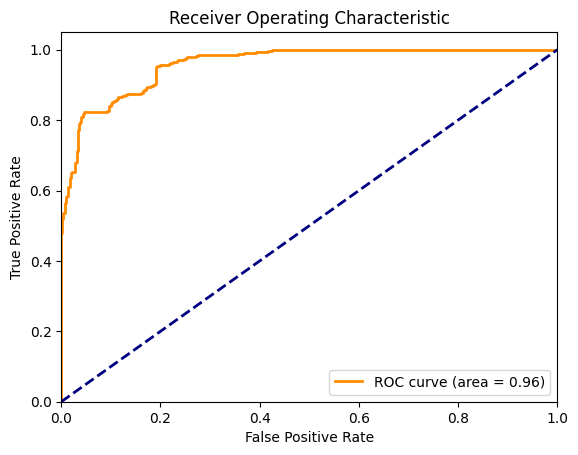

In [ ]:
import matplotlib.pyplot as plt

# Calcula la curva ROC
fpr, tpr, thresholds = metrics.roc_curve(y_real, predictions)

# Calcula el área bajo la curva ROC (AUC)
roc_auc = metrics.auc(fpr, tpr)

# Trazar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Modelo 2

In [ ]:
base_model2 = VGG16(weights="imagenet", include_top=False, input_shape=(width_shape, height_shape, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
# flatten the output of the convolutional part:
x = keras.layers.Flatten()(base_model2.output)
# three hidden layers
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dense(512, activation='relu')(x)
# final softmax layer with two categories (dog and cat)
predictions = keras.layers.Dense(1, activation='sigmoid')(x)

# creating the full model:
full_model1 = keras.models.Model(inputs=base_model2.input, outputs=predictions)
full_model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layer in base_model2.layers:
    layer.trainable = False

In [ ]:
full_model1.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adamax(lr=0.001),
                  metrics=['acc'])
history = full_model1.fit_generator(

    train_generator,
    validation_data = test_set,
    workers=10,
    epochs=5,
)

<ipython-input-13-ee1986312f8f>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = full_model1.fit_generator(


Epoch 1/5
120/120 [==============================] - 3756s 31s/step - loss: 0.2879 - acc: 0.9067 - val_loss: 0.6313 - val_acc: 0.6622
Epoch 2/5
120/120 [==============================] - 3630s 30s/step - loss: 0.0441 - acc: 0.9872 - val_loss: 0.7273 - val_acc: 0.6524
Epoch 3/5
120/120 [==============================] - 3678s 31s/step - loss: 0.0327 - acc: 0.9906 - val_loss: 0.2892 - val_acc: 0.8770
Epoch 4/5
120/120 [==============================] - 3680s 31s/step - loss: 0.0114 - acc: 0.9982 - val_loss: 0.7832 - val_acc: 0.6836
Epoch 5/5
120/120 [==============================] - 3612s 30s/step - loss: 0.0081 - acc: 0.9982 - val_loss: 0.9883 - val_acc: 0.6703


In [ ]:
names = ['Cura','Falla']

test_data_dir = '/content/drive/MyDrive/Univercidad/Univercidad_/DATA/TEST'
test_datagen = ImageDataGenerator(rescale= 1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape),
    batch_size = batch_size,
    class_mode='binary',
    shuffle=False)

predictions = full_model1.predict_generator(generator=test_generator)

y_real = test_generator.classes

Found 1637 images belonging to 2 classes.


<ipython-input-14-f9c51f4c35e1>:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = full_model1.predict_generator(generator=test_generator)


In [ ]:
print(predictions)

In [ ]:
#genero las etiquetas para cada predicción
y_pred =predictions[:,0]>0.5

In [ ]:
#Generación de la matriz
from sklearn import metrics

matc=metrics.confusion_matrix(y_real, y_pred)

print(metrics.classification_report(y_real,y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.9728    0.8048    0.8809       712
           1     0.8674    0.9827    0.9214       925

    accuracy                         0.9053      1637
   macro avg     0.9201    0.8937    0.9012      1637
weighted avg     0.9132    0.9053    0.9038      1637



In [ ]:
import matplotlib.pyplot as plt

# Calcula la curva ROC
fpr, tpr, thresholds = metrics.roc_curve(y_real, predictions)

# Calcula el área bajo la curva ROC (AUC)
roc_auc = metrics.auc(fpr, tpr)

# Trazar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Modelo con busqueda

In [ ]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier

ModuleNotFoundError: ignored

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
def build_model(num_dense_layers=1, num_units=64):
    model = Sequential()

    vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(width_shape, height_shape, 3))
    vgg_model.trainable = False  # Not trainable weights

    for layer in vgg_model.layers:
        layer.trainable = False

    model.add(vgg_model)
    model.add(Flatten())

    # Agregar capas totalmente conectadas
    for _ in range(num_dense_layers):
        model.add(Dense(num_units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Parte 1: Búsqueda del número de capas densas y número de unidades
param_grid_part1 = {
    'num_dense_layers': [2, 3,4],
    'num_units': [128, 256, 512,1024]
}

# Modificar aquí para pasar los parámetros al constructor del KerasClassifier
model = KerasClassifier(build_fn=build_model, verbose=0, num_dense_layers=1, num_units=64)
grid_search_part1 = GridSearchCV(model, param_grid=param_grid_part1, scoring='f1', cv=10, verbose=2)

# Extraer imágenes y etiquetas del generador de flujo de datos
X_train, y_train = train_generator.next()
X_test, y_test = test_set.next()

# Ajustar el modelo con los datos de entrenamiento
history_part1 = grid_search_part1.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stopping])
best_model_part1 = grid_search_part1.best_estimator_
best_params_part1 = grid_search_part1.best_params_

Fitting 10 folds for each of 4 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


58889256/58889256 [==============================] - 0s 0us/step
[CV] END ..................num_dense_layers=2, num_units=128; total time= 4.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=2, num_units=128; total time= 5.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=2, num_units=128; total time= 4.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=2, num_units=128; total time= 4.6min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=2, num_units=128; total time= 5.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=2, num_units=128; total time= 4.3min
[CV] END ..................num_dense_layers=2, num_units=128; total time= 4.9min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=2, num_units=128; total time= 4.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=2, num_units=128; total time= 3.9min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=2, num_units=128; total time= 4.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=2, num_units=512; total time= 4.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=2, num_units=512; total time= 4.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=2, num_units=512; total time= 4.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=2, num_units=512; total time= 5.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=2, num_units=512; total time= 4.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=2, num_units=512; total time= 4.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=2, num_units=512; total time= 4.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=2, num_units=512; total time= 4.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=2, num_units=512; total time= 4.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=2, num_units=512; total time= 4.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=3, num_units=128; total time= 4.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=3, num_units=128; total time= 5.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=3, num_units=128; total time= 4.6min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=3, num_units=128; total time= 4.0min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=3, num_units=128; total time= 4.8min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=3, num_units=128; total time= 4.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=3, num_units=128; total time= 5.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=3, num_units=128; total time= 4.7min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=3, num_units=128; total time= 5.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=3, num_units=128; total time= 5.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=3, num_units=512; total time= 4.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=3, num_units=512; total time= 4.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=3, num_units=512; total time= 3.9min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=3, num_units=512; total time= 4.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=3, num_units=512; total time= 4.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=3, num_units=512; total time= 4.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=3, num_units=512; total time= 4.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=3, num_units=512; total time= 4.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=3, num_units=512; total time= 4.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..................num_dense_layers=3, num_units=512; total time= 4.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
print(best_params_part1)

{'num_dense_layers': 2, 'num_units': 128}


In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


In [ ]:
import streamlit as st

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Parámetros
batch_size = 32
width_shape = 224
height_shape = 224
directory = '/content/drive/MyDrive/Univercidad/Univercidad_/DATA/'

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_generator= train_datagen.flow_from_directory(directory +'TRAIN',
                                                 target_size = (width_shape, height_shape),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 3814 images belonging to 2 classes.


In [ ]:
valid_datagen = ImageDataGenerator(rescale = 1./255)
test_set = valid_datagen.flow_from_directory(directory + 'VALID',
                                            target_size = (width_shape, height_shape),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1732 images belonging to 2 classes.


In [ ]:
base_model2 = VGG16(weights="imagenet", include_top=False, input_shape=(width_shape, height_shape, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# flatten the output of the convolutional part:
x = keras.layers.Flatten()(base_model2.output)
# three hidden layers
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dense(128, activation='relu')(x)
# final softmax layer with two categories (dog and cat)
predictions = keras.layers.Dense(1, activation='sigmoid')(x)

# creating the full model:
full_model1 = keras.models.Model(inputs=base_model2.input, outputs=predictions)
full_model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layer in base_model2.layers:
    layer.trainable = False

In [ ]:
full_model1.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adamax(lr=0.001),
                  metrics=['acc'])
history = full_model1.fit_generator(

    train_generator,
    validation_data = test_set,
    workers=10,
    epochs=10,
)

<ipython-input-16-6fd0302d7d8e>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = full_model1.fit_generator(


Epoch 1/10


KeyboardInterrupt: ignored

In [ ]:
names = ['Cura','Falla']

test_data_dir = '/content/drive/MyDrive/Univercidad/Univercidad_/DATA/TEST'
test_datagen = ImageDataGenerator(rescale= 1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape),
    batch_size = batch_size,
    class_mode='binary',
    shuffle=False)

predictions = full_model1.predict_generator(generator=test_generator)

y_real = test_generator.classes

Found 1637 images belonging to 2 classes.


<ipython-input-19-f9c51f4c35e1>:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = full_model1.predict_generator(generator=test_generator)


In [ ]:
#genero las etiquetas para cada predicción
y_pred =predictions[:,0]>0.5

In [ ]:
#Generación de la matriz
from sklearn import metrics

matc=metrics.confusion_matrix(y_real, y_pred)


# Visualizar la matriz de confusión
st.write("### Matriz de Confusión")
st.table(matc)

st.write("### Informe de Clasificación")
st.text(metrics.classification_report(y_real, y_pred, digits=4))

print(metrics.classification_report(y_real,y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.9641    0.8287    0.8912       712
           1     0.8810    0.9762    0.9262       925

    accuracy                         0.9120      1637
   macro avg     0.9225    0.9024    0.9087      1637
weighted avg     0.9171    0.9120    0.9110      1637



In [ ]:
streamlit run app.py

In [ ]:
import matplotlib.pyplot as plt

# Calcula la curva ROC
fpr, tpr, thresholds = metrics.roc_curve(y_real, predictions)

# Calcula el área bajo la curva ROC (AUC)
roc_auc = metrics.auc(fpr, tpr)

# Trazar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Graficar Loss y Accuracy durante el entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Época')
plt.title('Loss vs Época')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Época')
plt.title('Accuracy vs Época')

plt.tight_layout()
plt.show()

In [ ]:
import streamlit as st
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from sklearn import metrics

In [ ]:
# Monta el drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Parámetros
width_shape = 224
height_shape = 224
directory = '/content/drive/MyDrive/Univercidad/Univercidad_/DATA/'

In [ ]:
# Widgets en la barra lateral
st.sidebar.title("Parámetros")
batch_size = st.sidebar.slider("Tamaño del lote", min_value=1, max_value=64, value=32)
epochs = st.sidebar.slider("Épocas", min_value=1, max_value=50, value=10)

2023-12-31 11:40:18.308 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [ ]:
# Carga de datos
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(directory + 'TRAIN',
                                                    target_size=(width_shape, height_shape),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

valid_datagen = ImageDataGenerator(rescale=1./255)
test_set = valid_datagen.flow_from_directory(directory + 'VALID',
                                             target_size=(width_shape, height_shape),
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 3814 images belonging to 2 classes.
Found 1732 images belonging to 2 classes.


In [ ]:
 #Construcción del modelo
base_model2 = VGG16(weights="imagenet", include_top=False, input_shape=(width_shape, height_shape, 3))

# Añadir capas personalizadas
x = Flatten()(base_model2.output)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
# Crear el modelo completo
full_model1 = Model(inputs=base_model2.input, outputs=predictions)

# Congelar capas base
for layer in base_model2.layers:
    layer.trainable = False

# Compilar el modelo
full_model1.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

# Entrenamiento del modelo
history = full_model1.fit_generator(train_generator, validation_data=test_set, workers=10, epochs=6)

<ipython-input-8-f48f4392ad66>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = full_model1.fit_generator(train_generator, validation_data=test_set, workers=10, epochs=6)


Epoch 1/6
120/120 [==============================] - 3635s 30s/step - loss: 0.1919 - acc: 0.9192 - val_loss: 2.7695 - val_acc: 0.3389
Epoch 2/6
120/120 [==============================] - 3511s 29s/step - loss: 0.0426 - acc: 0.9840 - val_loss: 0.5571 - val_acc: 0.7598
Epoch 3/6
120/120 [==============================] - 3498s 29s/step - loss: 0.0132 - acc: 0.9966 - val_loss: 1.1279 - val_acc: 0.6270
Epoch 4/6
120/120 [==============================] - 3512s 29s/step - loss: 0.0058 - acc: 0.9987 - val_loss: 0.9796 - val_acc: 0.6749
Epoch 5/6
120/120 [==============================] - 3506s 29s/step - loss: 0.0042 - acc: 0.9995 - val_loss: 0.9620 - val_acc: 0.6709
Epoch 6/6
120/120 [==============================] - 3511s 29s/step - loss: 0.0066 - acc: 0.9971 - val_loss: 6.3496 - val_acc: 0.3279


In [ ]:
# Cargar datos de prueba
test_data_dir = '/content/drive/MyDrive/Univercidad/Univercidad_/DATA/TEST'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(width_shape, height_shape),
                                                  batch_size=batch_size,
                                                  class_mode='binary',
                                                  shuffle=False)

Found 1637 images belonging to 2 classes.


In [ ]:
# Hacer predicciones
predictions = full_model1.predict_generator(generator=test_generator)
y_real = test_generator.classes

# Generar las etiquetas para cada predicción
y_pred = predictions[:, 0] > 0.5

<ipython-input-12-3cd90b933167>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = full_model1.predict_generator(generator=test_generator)


In [ ]:
# Generar la matriz de confusión
matc = metrics.confusion_matrix(y_real, y_pred)

# Interfaz de Streamlit
st.title("Aplicación de Clasificación de Imágenes")
st.sidebar.title("Parámetros")

# Mostrar la matriz de confusión en la interfaz de Streamlit
st.subheader("Matriz de Confusión")
st.text("Verdaderos Positivos | Falsos Positivos")
st.text("Falsos Negativos | Verdaderos Negativos")
st.text(matc)

# Mostrar el informe de clasificación
st.subheader("Informe de Clasificación")
st.text(metrics.classification_report(y_real, y_pred, digits=4))

DeltaGenerator()

In [ ]:
!pip install streamlit
!pip install pyngrok

In [ ]:
!pip install streamlit

# Escribe tu aplicación Streamlit en un archivo .py
with open('streamlit_app.py', 'w') as f:
    f.write("""
    import streamlit as st

    def main():
        st.title("¡Hola, Streamlit en Google Colab!")
        st.write("Este es un ejemplo simple de Streamlit ejecutándose en Google Colab.")

    if __name__ == '__main__':
        main()
    """)

# Ejecuta tu aplicación Streamlit en segundo plano
!streamlit run streamlit_app.py &

# Accede a la interfaz de usuario de Streamlit
# Debería aparecer un enlace en la salida que puedes abrir haciendo clic
# o copiando y pegando en tu navegador web.
!pgrep streamlit | xargs -I {} kill -9 {}  # Detén el proceso para liberar el puerto

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.73.60.140:8501

